In [1]:
import tensorflow as tf
import numpy as np

C:\Users\acyrl\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
from nac import nac
from nalu import nalu
import GenData as gd

In [6]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [7]:
reset_graph()

from datetime import datetime

now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)



In [132]:
epochs = 50
learning_rate = 0.01
batch_size = 20

# generate dataset.
X_data, Y_data = gd.gd_uniform(size=10000)

# define placeholders and network
X = tf.placeholder(tf.float32, shape=[None, 2]) # batch size here [bacth_size, 2] is a bad idea.
Y_true = tf.placeholder(tf.float32, shape=[None, 1]) # batch size here [bacth_size, 2] is a bad idea.
Y_pred = nalu(X, 1)

# loss and train operations
loss = tf.losses.absolute_difference(Y_pred, Y_true) # NALU uses mse
#optimizer = tf.train.AdamOptimizer(learning_rate)
optimizer = tf.train.RMSPropOptimizer(learning_rate)
train_op = optimizer.minimize(loss)


In [133]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [134]:
nac_summary = tf.summary.scalar('nac', loss)
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

In [135]:
for ep in range(epochs):
    
    i = 0
    gts = 0
        
    while i < len(X_data):
        xs, ys = X_data[i:i+batch_size], Y_data[i:i+batch_size]
        _, ys_pred, l = sess.run([train_op, Y_pred, loss], feed_dict={X: xs, Y_true: ys})

            # calculate number of correct predictions from batch
        gts += np.sum(np.isclose(ys, ys_pred, atol=1e-4, rtol=1e-4)) 
        
        # Log it for tensorBoard.
        summary_str = nac_summary.eval(session=sess, feed_dict={X: xs, Y_true: ys})
        step = ep *  len(X_data) + i
        file_writer.add_summary(summary_str, step)
        
        i += batch_size
        
        
    acc = gts/len(Y_data)
    print('epoch {2}, loss: {0}, accuracy: {1}'.format(l, acc, ep))

epoch 0, loss: 0.06339984387159348, accuracy: 0.0
epoch 1, loss: 0.0007116853957995772, accuracy: 0.0047
epoch 2, loss: 1.6903877622098662e-05, accuracy: 0.9604
epoch 3, loss: 3.957748504035408e-06, accuracy: 0.9814
epoch 4, loss: 2.300739197380608e-06, accuracy: 0.9862
epoch 5, loss: 1.5974044345057337e-06, accuracy: 0.9893
epoch 6, loss: 1.5854835737627582e-06, accuracy: 0.9911
epoch 7, loss: 5.841255301675119e-07, accuracy: 0.9921
epoch 8, loss: 5.841255301675119e-07, accuracy: 0.9933
epoch 9, loss: 5.841255301675119e-07, accuracy: 0.9938
epoch 10, loss: 5.841255301675119e-07, accuracy: 0.9942
epoch 11, loss: 5.841255301675119e-07, accuracy: 0.9949
epoch 12, loss: 5.841255301675119e-07, accuracy: 0.9951
epoch 13, loss: 5.841255301675119e-07, accuracy: 0.9953
epoch 14, loss: 6.556511067401516e-08, accuracy: 0.9956
epoch 15, loss: 6.556511067401516e-08, accuracy: 0.9958
epoch 16, loss: 6.556511067401516e-08, accuracy: 0.996
epoch 17, loss: 6.556511067401516e-08, accuracy: 0.996
epoch 

In [ ]:
saver = tf.train.Saver()

In [ ]:
save_path = saver.save(sess, "./model.ckpt")

In [143]:
file_writer.close()

In [ ]:
reset_graph()

In [137]:
Xtest, Ytest = gen_data_unif.generate_dataset(_min=15, _max=25, size=10000)

In [138]:
#loss2 =tf.less(tf.abs(Y_pred - Y_true), 1e-3)
#loss3 = tf.metrics.mean_absolute_error(Y_true, Y_pred) # NALU uses mse
_, _, l = sess.run([train_op, Y_pred, loss], feed_dict={X: Xtest, Y_true: Ytest})

# Metrics has to take into account the units of numbers. As in, percetange off maybe?

In [139]:
l

8.955002e-07

In [140]:
import pandas as pd
plot_data = pd.DataFrame(data={'index': [], 'error':[]})

In [141]:
for i in range(20, 5000):
    Xtest, Ytest = gen_data_unif.generate_dataset(_min=i*10, _max=(i+1)*10-1, size=500)
    _, _, l = sess.run([train_op, Y_pred, loss], feed_dict={X: Xtest, Y_true: Ytest})
    plot_data = pd.concat([plot_data, pd.DataFrame({'index':[i*10], 'error':[l]})])
    

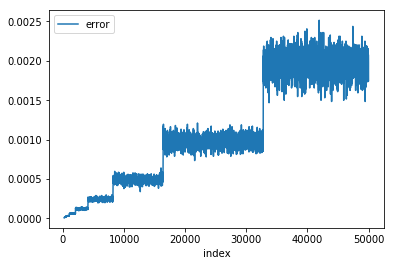

In [126]:
plot_data.plot(x='index', y='error')

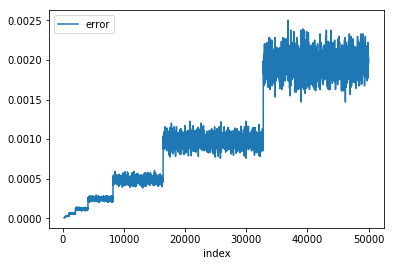

In [142]:
plot_data.plot(x='index', y='error')